In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")
test_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test.csv")

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


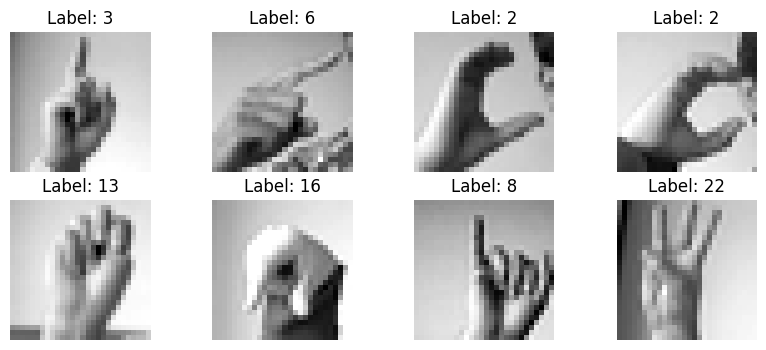

In [5]:
plt.figure(figsize=(10,4))
for i in range(8):
    img = train_df.drop("label", axis=1).iloc[i].values.reshape(28,28)
    label = train_df['label'].iloc[i]
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

In [6]:
train_df["label"].value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

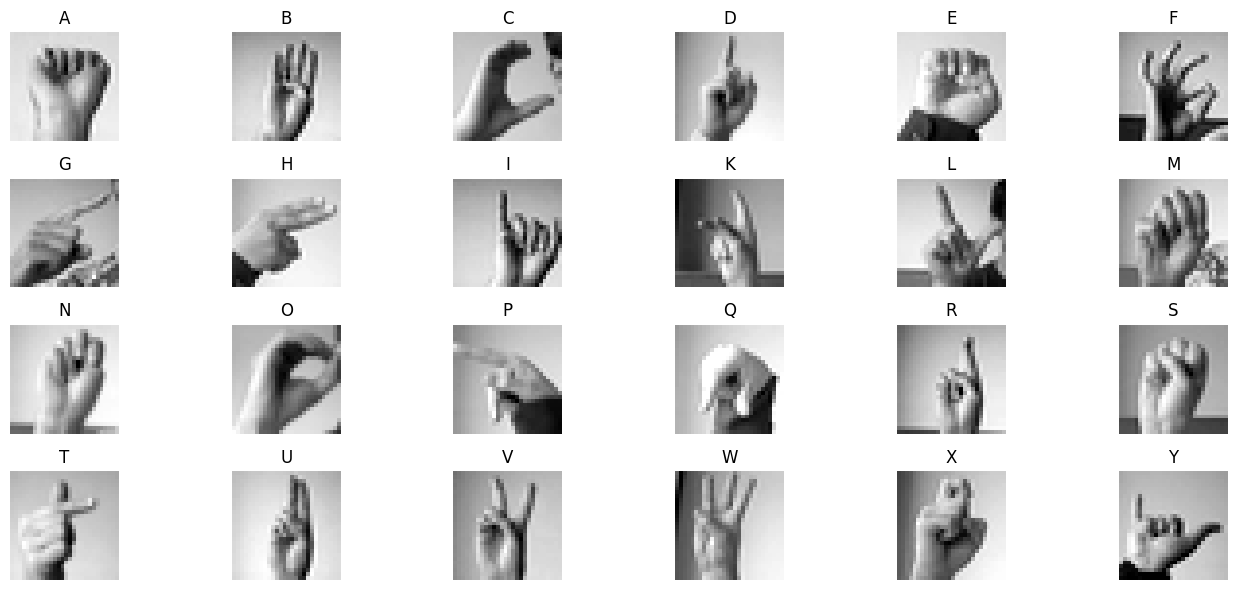

In [7]:
# Label → harf eşlemesi (J ve Z yok)
labels_map = {
    0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I',
    10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R',
    18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y'
}

# Görselleştirme
plt.figure(figsize=(14,6))
sorted_labels = sorted(labels_map.keys())  # Label numaralarını sırala

for i, label in enumerate(sorted_labels):
    # Label’a ait ilk örnek resmi al
    img = train_df[train_df['label']==label].drop("label", axis=1).iloc[0].values.reshape(28,28)
    plt.subplot(4,6,i+1)  # 24 sınıf için 4x6 grid
    plt.imshow(img, cmap='gray')
    plt.title(labels_map[label])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Eğitim ve test setlerinden etiketleri ayırma
y_train = train_df['label'].values
y_test = test_df['label'].values

# Eğitim ve test setlerinden piksel verilerini ayırma
X_train = train_df.drop('label', axis=1).values
X_test = test_df.drop('label', axis=1).values

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (27455, 784)
Test seti boyutu: (7172, 784)


In [9]:
# Verileri 28x28 boyutuna yeniden şekillendirme
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Yeniden şekillendirilmiş eğitim seti boyutu:", X_train.shape)
print("Yeniden şekillendirilmiş test seti boyutu:", X_test.shape)

Yeniden şekillendirilmiş eğitim seti boyutu: (27455, 28, 28, 1)
Yeniden şekillendirilmiş test seti boyutu: (7172, 28, 28, 1)


In [10]:
# Piksel değerlerini 0-1 arasına normalleştirme
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
from tensorflow.keras.utils import to_categorical

# Etiketleri one-hot encoding formatına dönüştürme
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("Kodlanmış eğitim etiketleri boyutu:", y_train_encoded.shape)

2025-09-23 20:53:13.761501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758660793.995393      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758660794.065578      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Kodlanmış eğitim etiketleri boyutu: (27455, 25)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
# Modelin parametreleri
IMG_WIDTH, IMG_HEIGHT = 28, 28
NUM_CLASSES = 25 # Veri setindeki toplam sınıf sayısı

In [14]:
# Sequential modelini oluşturma
model = Sequential([
    # 1. Evrişim ve Birleştirme Katmanı
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),
    MaxPooling2D((2, 2)),
    
    # 2. Evrişim ve Birleştirme Katmanı
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # 3. Evrişim ve Birleştirme Katmanı
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Görüntü matrisini tek bir vektöre dönüştürme
    Flatten(),
    
    # Tam Bağlı Katmanlar
    Dense(512, activation='relu'),
    Dropout(0.5), # Aşırı öğrenmeyi (overfitting) önlemek için
    
    # Çıkış katmanı
    Dense(NUM_CLASSES, activation='softmax')
])

# Modeli derleme
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Modelin özetini görelim
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-23 20:53:30.445896: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,073 (1.96 MB)

 Trainable params: 514,073 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
EPOCHS = 20  # Epoch sayısını ihtiyaca göre artırabilirsiniz. 20-30 civarı daha iyi sonuç verebilir.
BATCH_SIZE = 64 # Aynı anda işlenecek veri sayısı

history = model.fit(
    X_train, y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test_encoded)
)

Epoch 1/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.2105 - loss: 2.5861 - val_accuracy: 0.7775 - val_loss: 0.7047
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.8457 - loss: 0.4469 - val_accuracy: 0.8685 - val_loss: 0.3929
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9620 - loss: 0.1252 - val_accuracy: 0.9142 - val_loss: 0.3057
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9874 - loss: 0.0453 - val_accuracy: 0.9294 - val_loss: 0.3051
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9930 - loss: 0.0255 - val_accuracy: 0.9367 - val_loss: 0.3006
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9961 - loss: 0.0150 - val_accuracy: 0.9194 - val_loss: 0.3327
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9966 - loss: 0.0141 - val_accuracy: 0.9258 - val_loss: 0.2801
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9980 - loss: 0.0082 - 

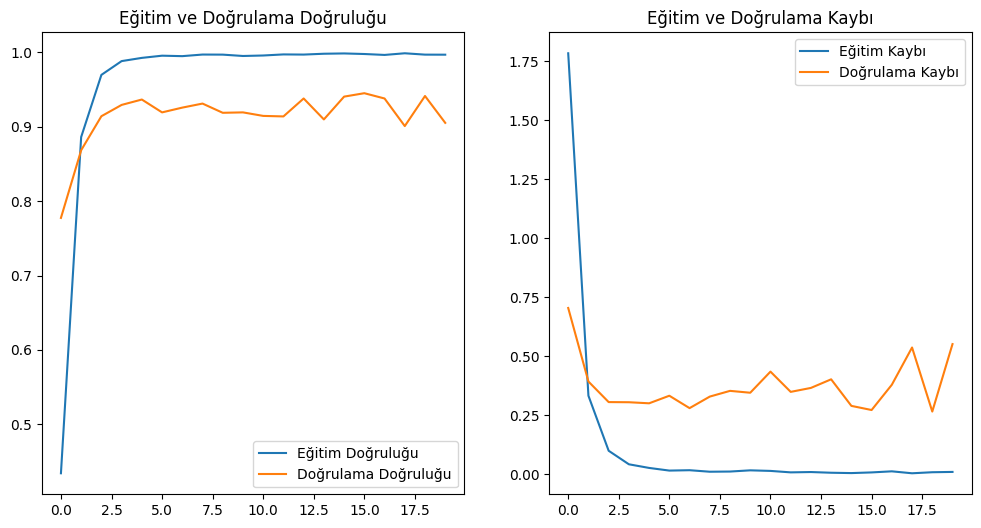

In [16]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama (validation) doğruluklarını alalım
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Eğitim ve doğrulama kayıp (loss) değerlerini alalım
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')

plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       331
           1       1.00      1.00      1.00       432
           2       0.94      1.00      0.97       310
           3       0.91      0.87      0.89       245
           4       0.96      0.99      0.97       498
           5       0.95      1.00      0.97       247
           6       0.93      0.78      0.85       348
           7       0.91      0.92      0.91       436
           8       0.89      1.00      0.94       288
          10       0.89      0.94      0.91       331
          11       0.65      1.00      0.79       209
          12       1.00      0.84      0.91       394
          13       0.94      1.00      0.97       291
          14       1.00      0.83      0.91       246
          15       0.93      1.00      0.96       347
          16       0.99      1.00      0.99       164
          17     

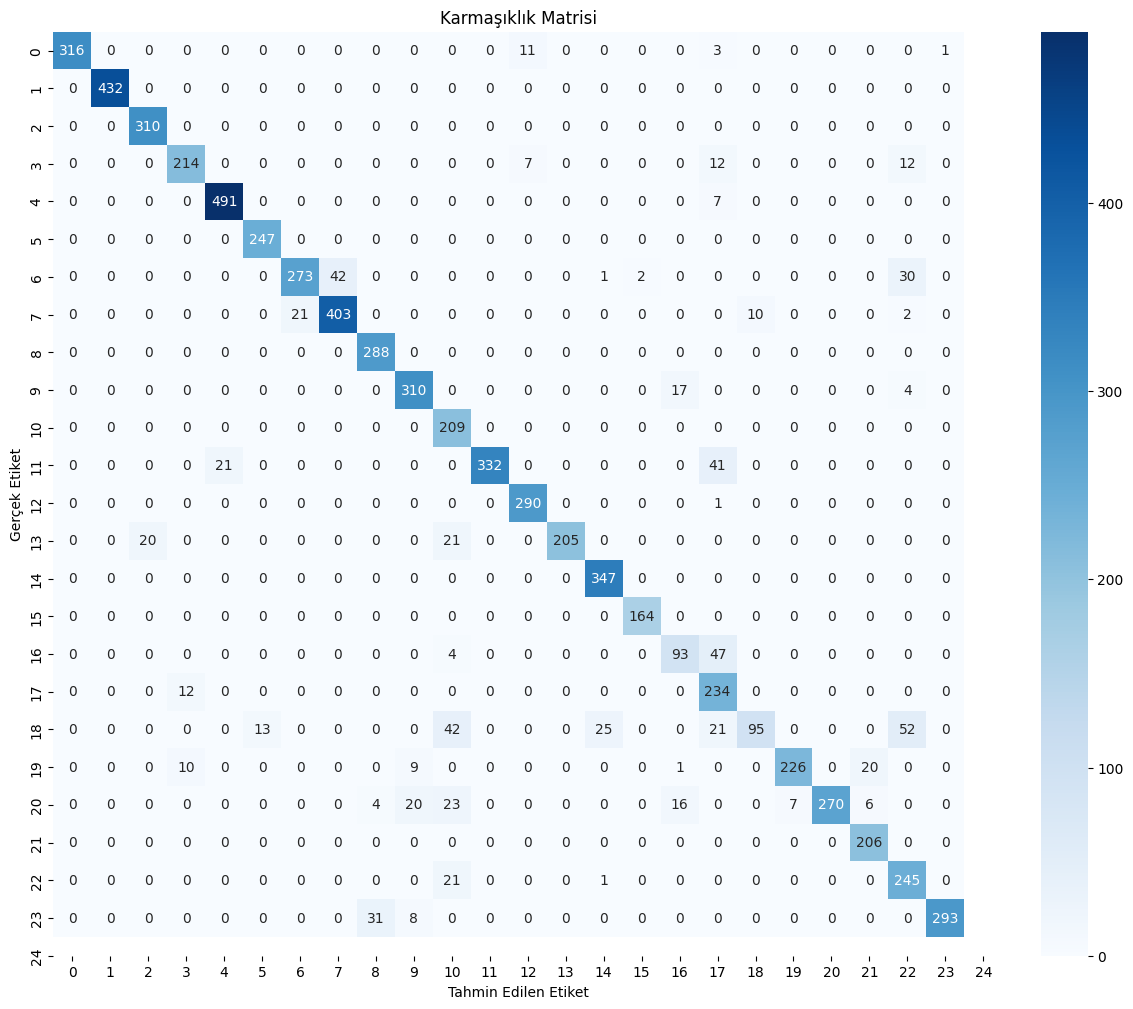

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Modelden tahminler yapalım. Tahminler olasılık dağılımı şeklinde gelecektir.
y_pred_probs = model.predict(X_test)

# Olasılık dağılımını en yüksek olasılığa sahip sınıf etiketine dönüştürelim.
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Gerçek etiketler (y_test) one-hot encoded formatından geri dönüştürülecek.
y_true_labels = np.argmax(y_test_encoded, axis=1)

# Sınıflandırma Raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_true_labels, y_pred_labels))

# Karmaşıklık Matrisi (Confusion Matrix)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(25), yticklabels=range(25))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()